<a href="https://colab.research.google.com/github/mad-havan/OIBSIP/blob/main/CAR_PRICE_PREDICTION_WITH_MACHINE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [28]:
df=pd.read_csv('/content/CarPrice_Assignment.csv')

In [29]:
df.head(15)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [30]:
df.shape

(205, 26)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [32]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [33]:
#checking the distribution of categorical data
print(df.CarName.value_counts())
print(df.fueltype.value_counts())
print(df.aspiration.value_counts())
print(df.doornumber.value_counts())
print(df.carbody.value_counts())
print(df.drivewheel.value_counts())
print(df.enginelocation.value_counts())
print(df.enginetype.value_counts())
print(df.cylindernumber .value_counts())
print(df.fuelsystem.value_counts())



toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64
gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64
mpfi  

Encoding Categorical Data

In [34]:
# encoding "fueltype" column
df.replace({'fueltype':{'gas':0,'diesel':1}},inplace=True)

# encoding "aspiration" column
df.replace({'aspiration':{'std':0,'turbo':1}},inplace=True)

# encoding "doornumber" column
df.replace({'doornumber':{'four':0,'two':1}},inplace=True)

# encoding "carbody" column
df.replace({'carbody':{'sedan':0,'hatchback':1,'wagon':2,'hardtop':3,'convertible':4}},inplace=True)

# encoding "drivewheel" column
df.replace({'drivewheel':{'fwd':0,'rwd':1,'4wd':2}},inplace=True)

# encoding "enginelocation" column
df.replace({'enginelocation':{'front':0,'rear':1}},inplace=True)

# encoding "enginetype" column
df.replace({'enginetype':{'ohc':0,'ohcf':1,'ohcv':2,'dohc':3,'l':4,'rotor':5,'dohcv':6}},inplace=True)

# encoding "cylindernumber" column
df.replace({'cylindernumber':{'four':0,'six':1,'five':2,'eight':3,'two':4,'three':5,'twelve':6}},inplace=True)

# encoding "fuelsystem" column
df.replace({'fuelsystem':{'mpfi':0,'2bbl':1,'idi':2,'1bbl':3,'spdi':4,'4bbl':5,'mfi':6,'spfi':7}},inplace=True)





In [35]:
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,0,1,4,1,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,0,0,1,4,1,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,0,0,1,1,1,0,94.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,0,0,0,0,0,0,99.8,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,0,0,0,0,2,0,99.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,0,0,1,0,0,0,99.8,...,136,0,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,0,0,0,0,0,0,105.8,...,136,0,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,0,0,0,2,0,0,105.8,...,136,0,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,0,1,0,0,0,0,105.8,...,131,0,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),0,1,1,1,2,0,99.5,...,131,0,3.13,3.40,7.0,160,5500,16,22,17859.167


In [36]:
X=df.drop(["CarName",'price'],axis=1)
Y=df['price']

In [37]:
print(X)

     car_ID  symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0         1          3         0           0           1        4           1   
1         2          3         0           0           1        4           1   
2         3          1         0           0           1        1           1   
3         4          2         0           0           0        0           0   
4         5          2         0           0           0        0           2   
..      ...        ...       ...         ...         ...      ...         ...   
200     201         -1         0           0           0        0           1   
201     202         -1         0           1           0        0           1   
202     203         -1         0           0           0        0           1   
203     204         -1         1           1           0        0           1   
204     205         -1         0           1           0        0           1   

     enginelocation  wheelb

In [38]:
print(Y)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


Splitting training and testing data

In [39]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

Model Training

Linear Regression

In [40]:
lin_reg_model=LinearRegression()

In [41]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [42]:
#Prediction on training data
prediction_train_data=lin_reg_model.predict(X_train)

In [43]:
# R SQUARED ERROR
accuracy=metrics.r2_score(Y_train,prediction_train_data)*100
accuracy

91.21445333793359

Visualize the actual and predicted prices

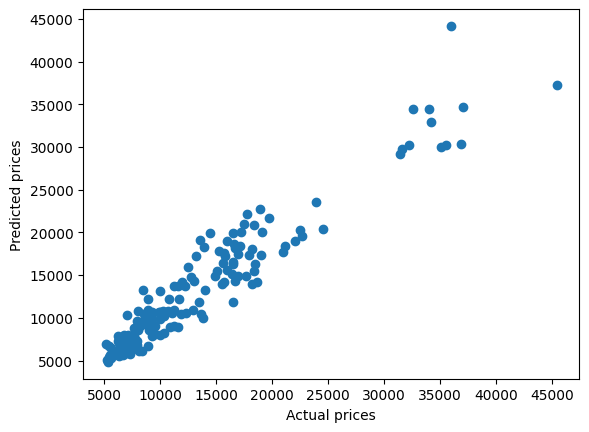

In [44]:
plt.scatter(Y_train,prediction_train_data)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.show()

<Axes: xlabel='price'>

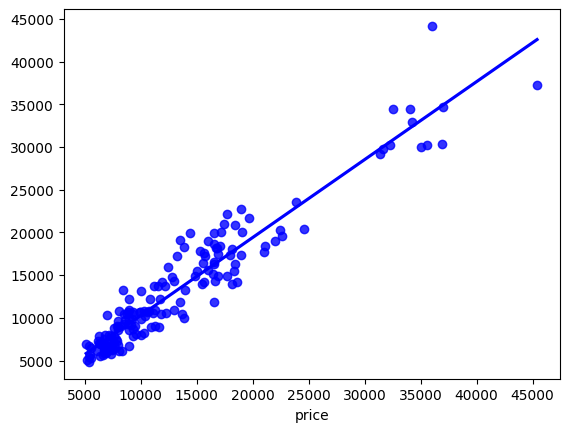

In [45]:
sns.regplot(x=Y_train,y=prediction_train_data,ci=None,color='blue')

In [46]:
pred_df=pd.DataFrame({'Actual Value':Y_train,'Predicted Value':prediction_train_data,'Difference':Y_train-prediction_train_data})
pred_df

,Actual Value,Predicted Value,Difference
66,18344.0,15501.399948,2842.600052
111,15580.0,16475.487611,-895.487611
153,6918.0,5835.335779,1082.664221
96,7499.0,6351.697649,1147.302351
38,9095.0,9206.673192,-111.673192
...,...,...,...
106,18399.0,20893.492483,-2494.492483
14,24565.0,20416.042367,4148.957633
92,6849.0,6281.936846,567.063154
179,15998.0,19009.696928,-3011.696928


Prediction on testing data

In [47]:
test_data_prediction=lin_reg_model.predict(X_test)

In [48]:
# R squared error
accuracy=metrics.r2_score(Y_test,test_data_prediction)*100
print(accuracy)

87.81706366288844


Visualize actual and predicted prices

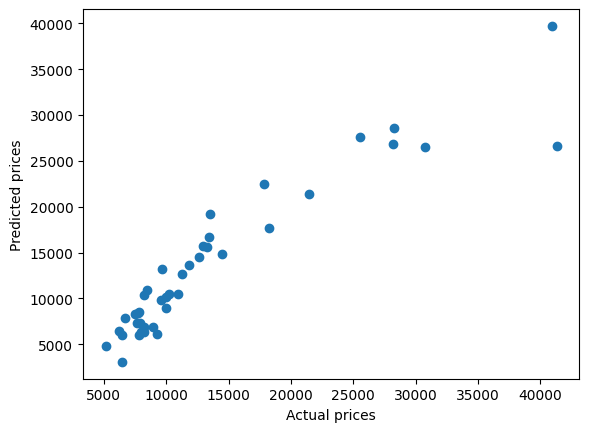

In [49]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.show()

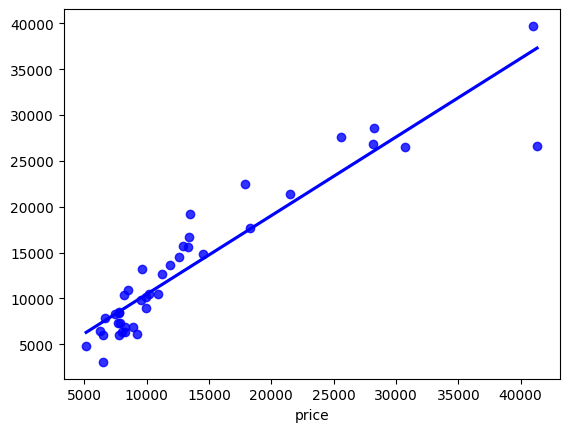

In [50]:
sns.regplot(x=Y_test,y=test_data_prediction,ci=None,color ='blue');

In [51]:
pred_df=pd.DataFrame({'Actual Value':Y_test,'Predicted Value':test_data_prediction,'Difference':Y_test-test_data_prediction})
pred_df

,Actual Value,Predicted Value,Difference
15,30760.000,26495.773629,4264.226371
9,17859.167,22527.602658,-4668.435658
100,9549.000,9839.420093,-290.420093
132,11850.000,13592.872817,-1742.872817
68,28248.000,28610.290262,-362.290262
95,7799.000,6055.557675,1743.442325
159,7788.000,8537.254088,-749.254088
162,9258.000,6131.807193,3126.192807
147,10198.000,10474.482126,-276.482126
182,7775.000,8359.070672,-584.070672
